Analysis with the NA12878 dataset. Takes the windows from the DEL labeled windows from all chromosomes. The windows were labeled according to the nanosv calls (Nanopore data), taking into account the confidence interval (CIPOS and CIEND).

## Load dependencies and setting output configuration

In [1]:
import numpy as np
from keras.utils.np_utils import to_categorical
import keras
import gzip
from collections import Counter

%pylab inline
%load_ext autoreload
%autoreload 2

Using TensorFlow backend.


Populating the interactive namespace from numpy and matplotlib


## Load data from npy files

In [2]:
sample_name = 'NA12878'
date = '010818'

datapath='/hpc/cog_bioinf/ridder/users/lsantuari/Processed/Test/'+date+'/TestData_'+date+'/'+sample_name+'/ChannelData/'
datapath_labels = '/hpc/cog_bioinf/ridder/users/lsantuari/Processed/Test/'+date+'/TestData_'+date+'/'+sample_name+ \
    '/LabelData_nanosv_manta/'
filename = '_channel_maker_real_germline.npy.gz'

In [39]:
# Load channel data and labels by chromosome

labels_only = True

#Leaving out chromosome Y and MT for the moment
chr_list = list(map(str, np.arange(1,23)))
chr_list.append('X')
print(chr_list)

data = []
labels = []

for i in chr_list:
#for i in [16, 17, 18]:
    
    print('Loading data and labels for Chr%s' % i)
    
    if not labels_only:
        data_file = datapath + str(i) + filename
        with gzip.GzipFile(data_file, "rb") as f:
            data_mat = np.load(f)
            data.extend(data_mat)
        f.close()

    label_file = datapath_labels + str(i) + '_label_ci_full_overlap.npy.gz'
    
    with gzip.GzipFile(label_file, "rb") as f:
        data_lab = np.load(f)
        #The list still includes a value (0) at position 0 that
        #makes the window boundaries fall off the chromosome boundaries
        #if i == '17':
        #    data_lab = data_lab[1:]
        labels.extend(data_lab)
    f.close()
    # print('Length of data:%d, label length:%d' % (len(data_mat), len(data_lab)))
    if not labels_only:
        assert len(data_mat) == len(data_lab)

print(Counter(labels))

if not labels_only:
    assert len(data) == len(labels)

#X_test=data[np.where(labels != 'no_del')]
#y_test = labels[np.where(labels != 'no_del')]
#X_test = X_test[:, [0,1,2,11,12,13], :]
#data = []
#labels = []

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', 'X']
Loading data and labels for Chr1
Loading data and labels for Chr2
Loading data and labels for Chr3
Loading data and labels for Chr4
Loading data and labels for Chr5
Loading data and labels for Chr6
Loading data and labels for Chr7
Loading data and labels for Chr8
Loading data and labels for Chr9
Loading data and labels for Chr10
Loading data and labels for Chr11
Loading data and labels for Chr12
Loading data and labels for Chr13
Loading data and labels for Chr14
Loading data and labels for Chr15
Loading data and labels for Chr16
Loading data and labels for Chr17
Loading data and labels for Chr18
Loading data and labels for Chr19
Loading data and labels for Chr20
Loading data and labels for Chr21
Loading data and labels for Chr22
Loading data and labels for ChrX
Counter({'noSV': 1073786, 'DEL_end': 1827, 'DEL_start': 1808, 'UK': 1273})


In [40]:
%%time
# Save data and labels

use_gz = False
labels_only = True

if use_gz:

    if not labels_only:
        data_output_file = datapath + '../X.npy.gz'
        with gzip.GzipFile(data_output_file, "wb") as f:
            np.save(f, data)
        f.close()

    label_output_file = datapath + '../y.npy.gz'
    with gzip.GzipFile(label_output_file, "wb") as f:
        np.save(f, labels)
    f.close()

else:
    #No gz
    if not labels_only:
        data_output_file_npy = datapath + '../X'
        np.save(data_output_file_npy, data)

    label_output_file_npy = datapath + '../y'
    np.save(label_output_file_npy, labels)

CPU times: user 259 ms, sys: 48 ms, total: 307 ms
Wall time: 573 ms


In [3]:
%%time
# Load data and labels

use_gz = True

if use_gz:
    
    data_output_file = datapath + '../X.npy.gz'
    with gzip.GzipFile(data_output_file, "rb") as f:
        data = np.load(f)
    f.close()

    label_output_file = datapath + '../y.npy.gz'
    with gzip.GzipFile(label_output_file, "rb") as f:
        labels = np.load(f)
    f.close()

else:
        
    data_output_file_npy = datapath + '../X.npy'
    data = np.load(data_output_file_npy)

    label_output_file_npy = datapath + '../y.npy'
    labels = np.load(label_output_file_npy)
    

CPU times: user 2min 26s, sys: 20 s, total: 2min 46s
Wall time: 2min 46s


In [4]:
#Use the UK label?
keep = np.where(labels!='UK')

data = data[keep]
labels = labels[keep]

In [5]:
#Relabel deletions
del_idx = np.where(np.logical_or(np.array(labels)=='DEL_start',np.array(labels)=='DEL_end'))
print(del_idx)
print(len(del_idx))
print(len(labels))
labels[del_idx] = 'DEL'

(array([   3170,    5708,    7214, ..., 1182880, 1182882, 1184145]),)
1
1184472


In [6]:
cnt_lab = Counter(labels)
#print([v for k, v in cnt_lab.items()])
min_v = min([v for k, v in cnt_lab.items()])

print(cnt_lab)
print('Minimum number of labels = ' + str(min_v))
#np.concatenate(data[np.where(labels == 'noSV')][]

Counter({'noSV': 1182310, 'DEL': 2162})
Minimum number of labels = 2162


In [7]:
data_balanced = []
labels_balanced = []

for l in cnt_lab.keys():
    #print(l)
    iw = np.where(labels==l)
    print(iw[0])
    ii = np.random.choice(a=iw[0], size=min_v, replace=False)
    data_balanced.extend(data[ii])
    labels_balanced.extend(labels[ii])

print(Counter(labels_balanced))

[      0       1       2 ... 1184469 1184470 1184471]
[   3170    5708    7214 ... 1182880 1182882 1184145]
Counter({'noSV': 2162, 'DEL': 2162})


In [8]:
X = np.array(data_balanced)
y = np.array(labels_balanced)

In [9]:
# Selecting only a few channels
#indices = np.array([0,1,2,9,12,15,18,19,20,23,26])
#X = X[:,indices,:]

#include_ii = np.where(y!='noSV')
#X = X[include_ii]
#y = y[include_ii]

In [10]:
X.shape

(4324, 27, 200)

In [11]:
y.shape

(4324,)

### Number of channels

In [12]:
number_channels = X.shape[1]
number_channels

27

In [13]:
#Split into training, validation and test set 60/20/20
cnt_lab = Counter(labels_balanced)
n_lab = [v for v in cnt_lab.values()][0]
i_train = int(n_lab*0.6)
i_val = i_train + int(n_lab*0.2)
print(i_train)
print(i_val)

X_train = []
y_train = []
X_val = []
y_val = []
X_test = []
y_test = []

for l in cnt_lab.keys():
    iw = np.where(y==l)
    #print(iw[0])
    #print(iw[0][:i_train])
    X_train.extend(X[iw[0][:i_train]])
    X_val.extend(X[iw[0][i_train:i_val]])
    X_test.extend(X[iw[0][i_val:]])
    
    y_train.extend(y[iw[0][:i_train]])
    y_val.extend(y[iw[0][i_train:i_val]])
    y_test.extend(y[iw[0][i_val:]])

X_train = np.array(X_train)
X_val = np.array(X_val)
X_test = np.array(X_test)

y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

print(y_train.shape)
print(y_val.shape)
print(y_test.shape)


1297
1729
(2594, 27, 200)
(864, 27, 200)
(866, 27, 200)
(2594,)
(864,)
(866,)


## Normalize data

In [ ]:
#coverage = np.median(X_train[:, 0, :]) #the median of the coverage in the normal cells
#coverage

#NA12878 median insert size: 368
#expected coverage:
hg19_len = 3095693981
read_len = 150
coverage = int(976976324 * read_len / hg19_len)
print(coverage)

In [ ]:
#not used now

expected_distance = 368

def normalize(X):       
    for i in range (0, len(X)):            
        for k in [3,5]:
            X[i][k] = np.divide(X[i][k],  X[i][1]/2 + 1/(10*X[i][1]+1)) #divide by number of clips
        for k in [4,6]:            
            X[i][k] = np.divide(X[i][k],  X[i][2]/2 +  1/(10*X[i][2]+1))
        for k in [3+11,5+11]:
            X[i][k] = np.divide(X[i][k],  X[i][1+11]/2 +  1/(10*X[i][12]+1))
        for k in [4+11,6+11]:            
            X[i][k] = np.divide(X[i][k],  X[i][2+11]/2+  1/(10*X[i][13]+1))
        for k in [3,4,5,6,14,15,16,17]:#the distance channels
            X[i][k] = np.divide(X[i][k], expected_distance)
        for j in range(0,number_channels):                                                                             
            X[i][j] = np.divide(X[i][j], coverage)*100
            
#normalize(X_train)
#normalize(X_val)
#normalize(X_test)

In [ ]:
#not used now

expected_distance = 150
def normalize(X):       
    for i in range (0, len(X)):                    
        for k in [3,4,5,6,14,15,16,17]:#the distance channels
            X[i][k] = np.divide(X[i][k], expected_distance)
        for j in range(0,number_channels):                                                                             
            X[i][j] = np.divide(X[i][j], coverage)*100     
normalize(X_train)
#normalize(X_val)
#normalize(X_test)

## Plots several  windows 

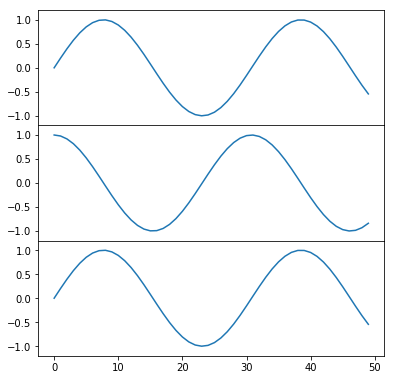

In [14]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                   xticklabels=[],
                   ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
                   ylim=(-1.2, 1.2))
ax3 = fig.add_axes([0.1, -0.3, 0.8, 0.4],
                   ylim=(-1.2, 1.2))

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x))
ax3.plot(np.sin(x));

noSV id: 1


AttributeError: 'Figure' object has no attribute 'set_cmap'

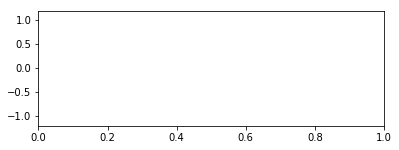

In [28]:
fig = plt.figure()
i = 1
shift = 0.4

print(y_train[i], 'id:', i)
#print('id:', i)
for j in range (0, number_channels): 

    ax = fig.add_axes([0.1, 0.1+j*shift, 0.8, 0.4],
                       ylim=(-1.2, 1.2))
    Z = [ (x - min(X_train[i][j]))/max(X_train[i][j]) for x in X_train[i][j]]

    ax.plot(Z)
        
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., prop={'size': 5})    
#plt.show()

In [44]:
n_windows = X_train.shape[0]
label = ["None"] * number_channels

In [45]:
label[0] = "cov"
label[1] = "L_CR"
label[2] = "R_CR"

label[3] = "INV_B"
label[4] = "INV_A"
label[5] = "R_CR_DUP_B"
label[6] = "L_CR_DUP_A"

label[7] = "F_L_CR_sum"
label[8] = "F_L_CR_num"
label[9] = "F_L_CR_med"
label[10] = "F_R_CR_sum"
label[11] = "F_R_CR_num"
label[12] = "F_R_CR_med"

label[13] = "R_L_CR_dist_sum"
label[14] = "R_L_CR_dist_num"
label[15] = "R_L_CR_dist_med"
label[16] = "R_R_CR_dist_sum"
label[17] = "R_R_CR_dist_num"
label[18] = "R_R_CR_dist_med"

label[19] = "L_SR"
label[20] = "R_SR"

label[21] = "L_SR_dist_sum"
label[22] = "L_SR_dist_num"
label[23] = "L_SR_dist_med"

label[24] = "R_SR_dist_sum"
label[25] = "R_SR_dist_num"
label[26] = "R_SR_dist_med"

In [46]:
from numpy import *
import math
import matplotlib.pyplot as plt

colors =['b','g', 'm', 'gray', 'r','c', 'darkgreen' ,'y', 'k', 'orange', 'gray']

def plot_channels(start_window, n_windows):
    for i in range (start_window, start_window + n_windows, 5):
        print('NanoSV:', y_train[i], 'DeepSV:', predicted[i], 'id:', i)
        #print('id:', i)
        for j in range (0, number_channels):   
            if j in [3, 6, 14, 17]:
                continue
            shift = 0
            start =0
            if j in [0,11]:
                shift = -100
            if j > 10:
                start = -60
            Z = [start + shift + 300 + x - 5*j*4 for x in X_train[i][j]]  
            #plt.ylim([100,700])
            if np.max(Z) > 1000:
                plt.ylim([-200,1000])
                Z = [start + shift + 300 + x - 5*j*4 - 400 for x in X_train[i][j]]  
            if j>10:
                plt.plot(Z,  label = label[j], linestyle=':', linewidth=1.5, color = colors[j % 11])
            else:
                plt.plot(Z, label = label[j], color = colors[j])
        
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., prop={'size': 5})    
        plt.show()

2594
NanoSV: 1 DeepSV: 1 id: 0


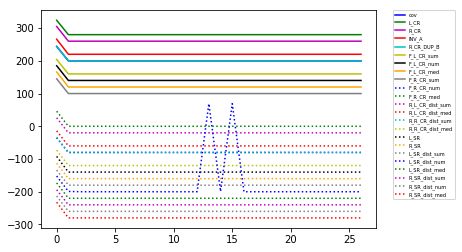

NanoSV: 1 DeepSV: 1 id: 5


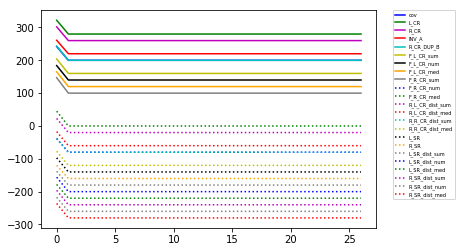

NanoSV: 1 DeepSV: 1 id: 10


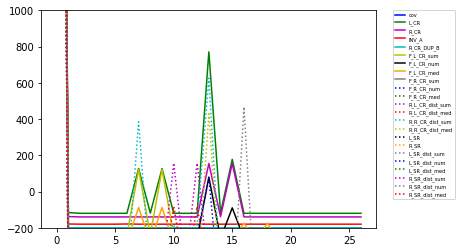

NanoSV: 1 DeepSV: 1 id: 15


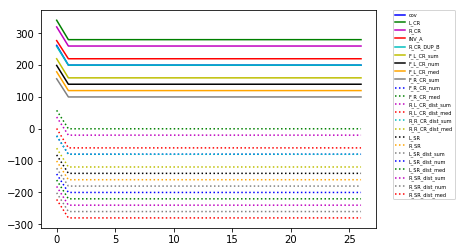

NanoSV: 1 DeepSV: 1 id: 20


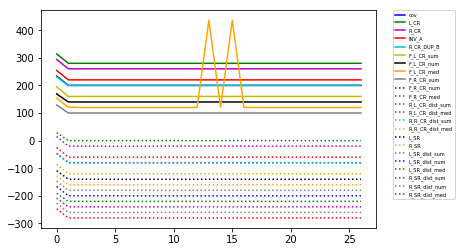

NanoSV: 1 DeepSV: 1 id: 25


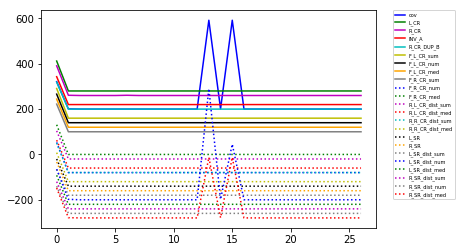

NanoSV: 1 DeepSV: 1 id: 30


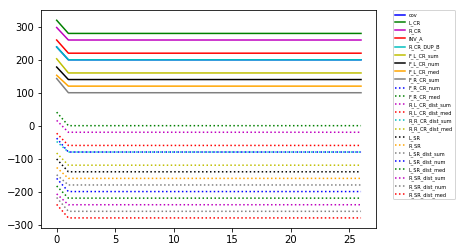

NanoSV: 1 DeepSV: 1 id: 35


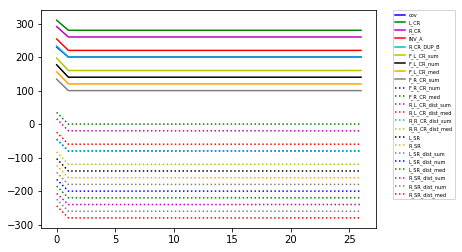

NanoSV: 1 DeepSV: 1 id: 40


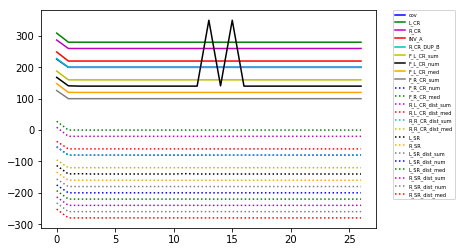

NanoSV: 1 DeepSV: 1 id: 45


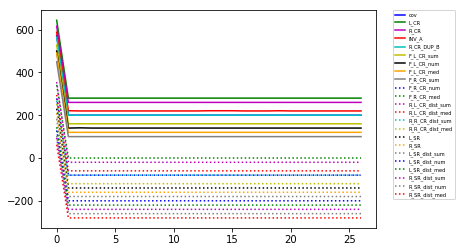

NanoSV: 1 DeepSV: 1 id: 50


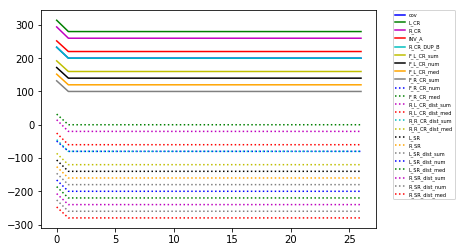

NanoSV: 1 DeepSV: 1 id: 55


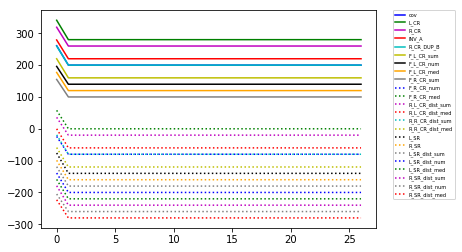

NanoSV: 1 DeepSV: 1 id: 60


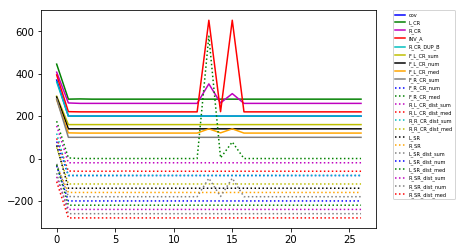

NanoSV: 1 DeepSV: 1 id: 65


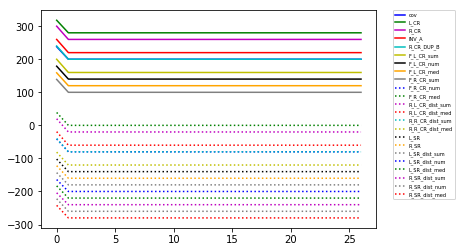

NanoSV: 1 DeepSV: 1 id: 70


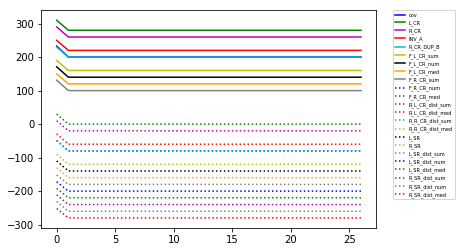

NanoSV: 1 DeepSV: 1 id: 75


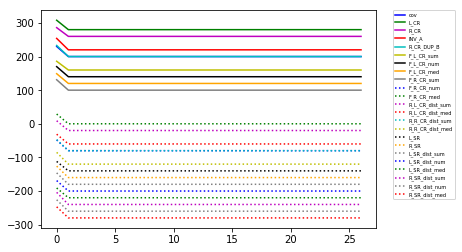

NanoSV: 1 DeepSV: 1 id: 80


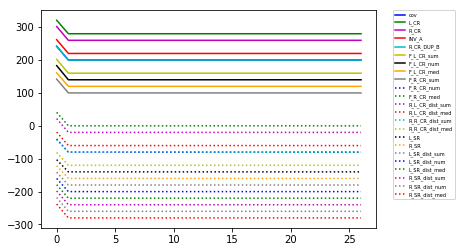

NanoSV: 1 DeepSV: 1 id: 85


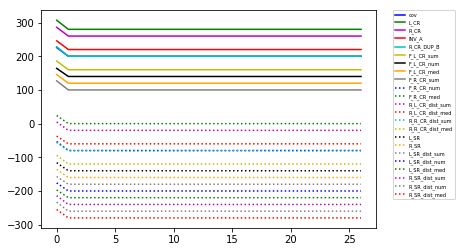

NanoSV: 1 DeepSV: 1 id: 90


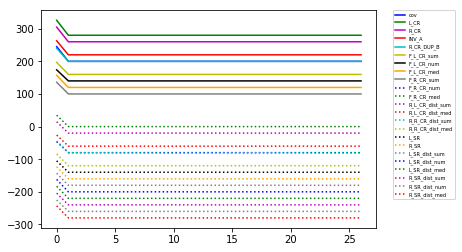

NanoSV: 1 DeepSV: 1 id: 95


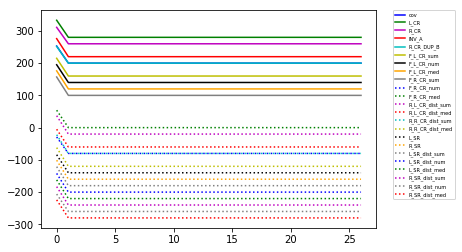

NanoSV: 1 DeepSV: 1 id: 100


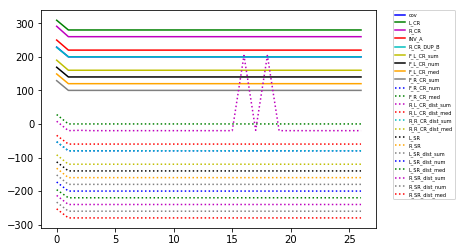

NanoSV: 1 DeepSV: 1 id: 105


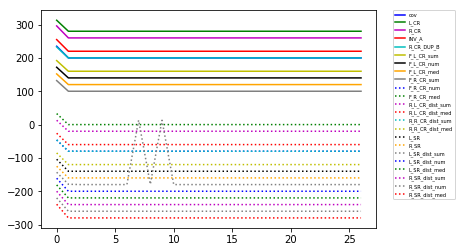

NanoSV: 1 DeepSV: 1 id: 110


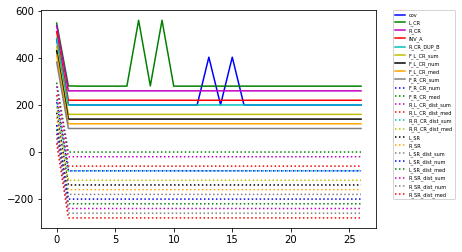

NanoSV: 1 DeepSV: 1 id: 115


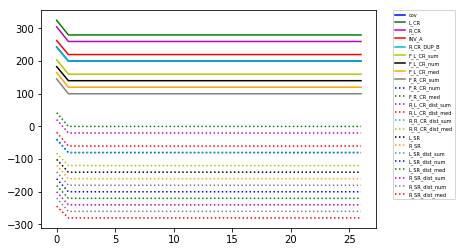

NanoSV: 1 DeepSV: 1 id: 120


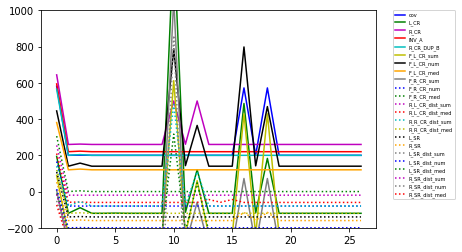

NanoSV: 1 DeepSV: 1 id: 125


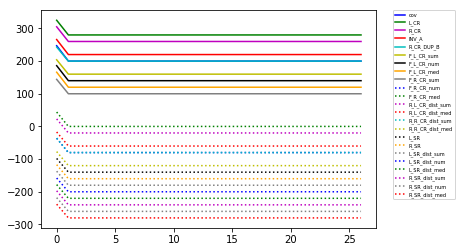

NanoSV: 1 DeepSV: 1 id: 130


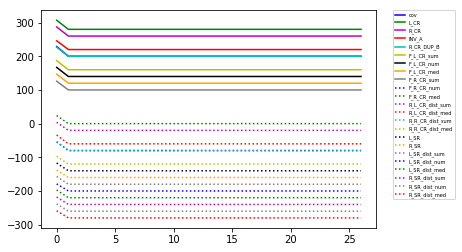

NanoSV: 1 DeepSV: 1 id: 135


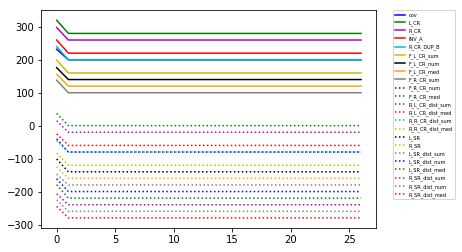

NanoSV: 1 DeepSV: 1 id: 140


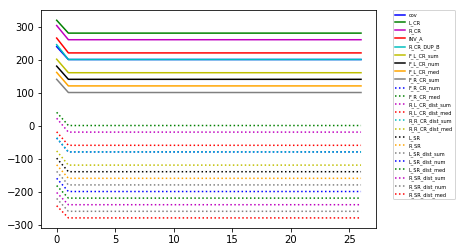

NanoSV: 1 DeepSV: 1 id: 145


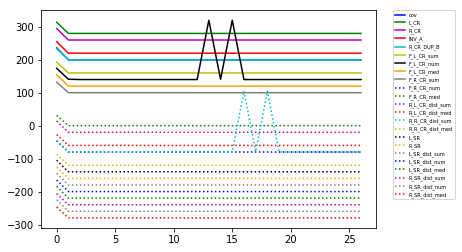

NanoSV: 1 DeepSV: 1 id: 150


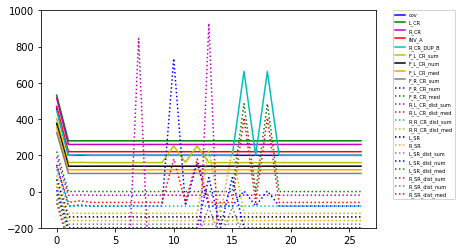

NanoSV: 1 DeepSV: 1 id: 155


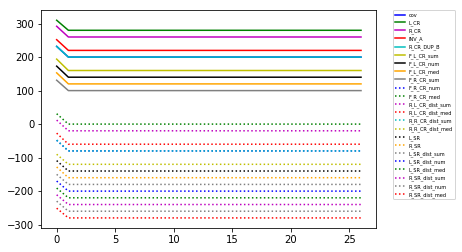

NanoSV: 1 DeepSV: 1 id: 160


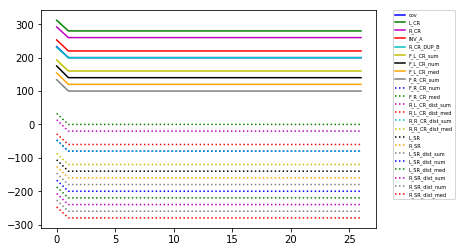

NanoSV: 1 DeepSV: 1 id: 165


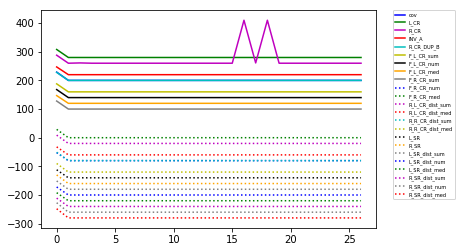

NanoSV: 1 DeepSV: 1 id: 170


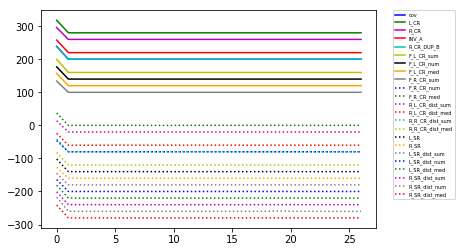

NanoSV: 1 DeepSV: 1 id: 175


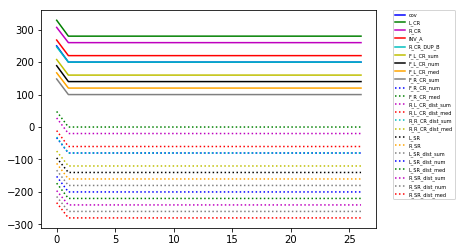

NanoSV: 1 DeepSV: 1 id: 180


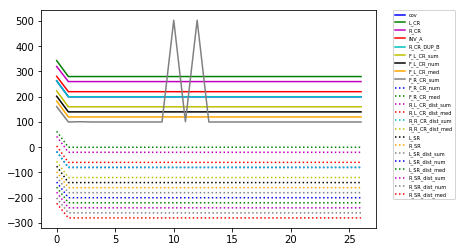

NanoSV: 1 DeepSV: 1 id: 185


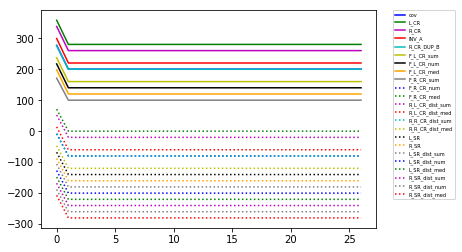

NanoSV: 1 DeepSV: 1 id: 190


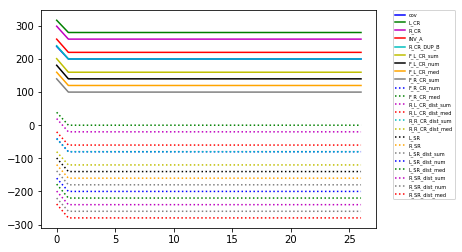

NanoSV: 1 DeepSV: 1 id: 195


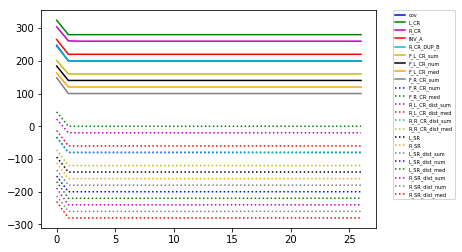

NanoSV: 1 DeepSV: 1 id: 200


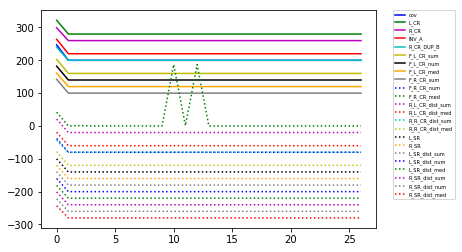

NanoSV: 1 DeepSV: 1 id: 205


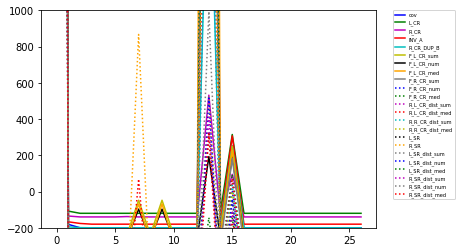

NanoSV: 1 DeepSV: 1 id: 210


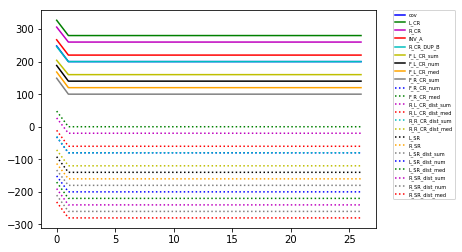

NanoSV: 1 DeepSV: 1 id: 215


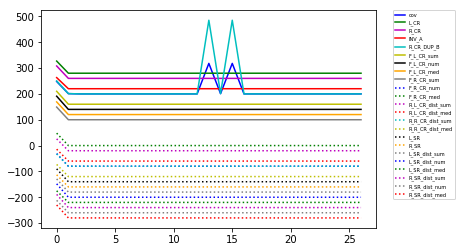

NanoSV: 1 DeepSV: 1 id: 220


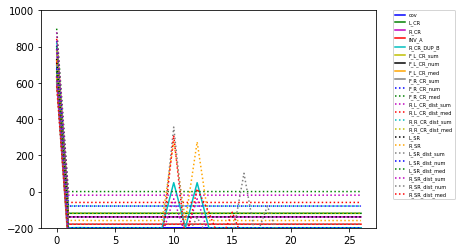

NanoSV: 1 DeepSV: 1 id: 225


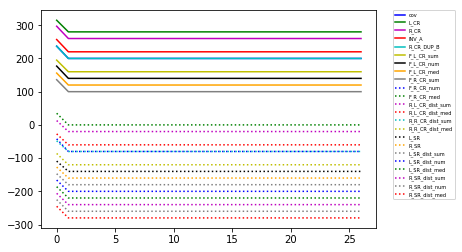

NanoSV: 1 DeepSV: 1 id: 230


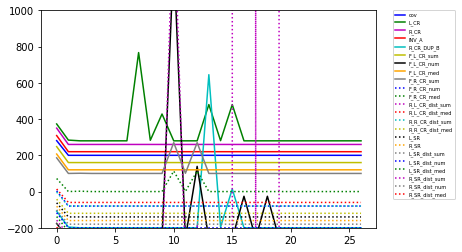

NanoSV: 1 DeepSV: 1 id: 235


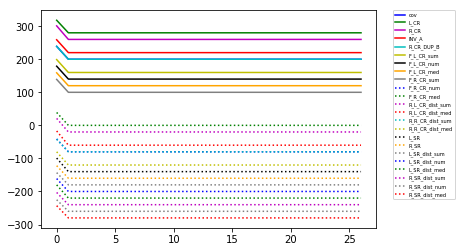

NanoSV: 1 DeepSV: 1 id: 240


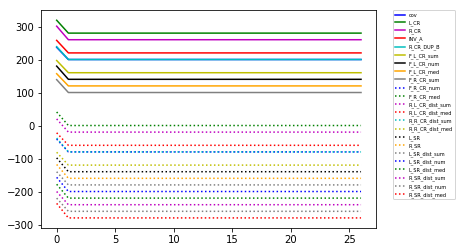

NanoSV: 1 DeepSV: 1 id: 245


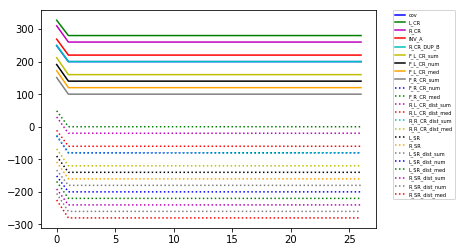

NanoSV: 1 DeepSV: 1 id: 250


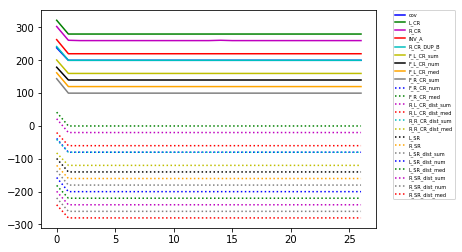

NanoSV: 1 DeepSV: 1 id: 255


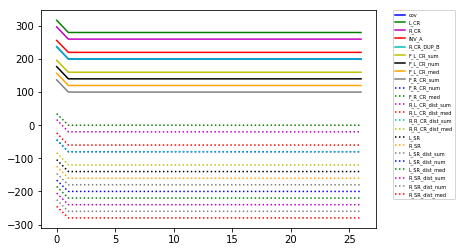

NanoSV: 1 DeepSV: 1 id: 260


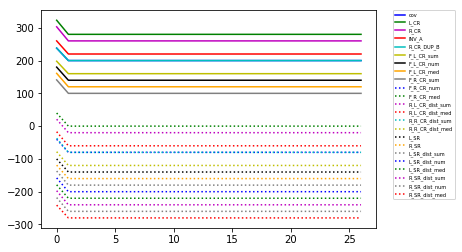

NanoSV: 1 DeepSV: 1 id: 265


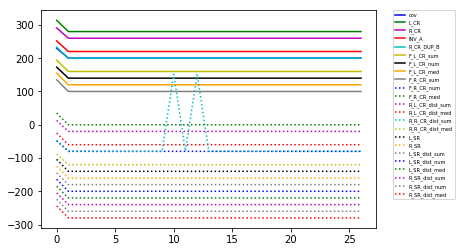

NanoSV: 1 DeepSV: 1 id: 270


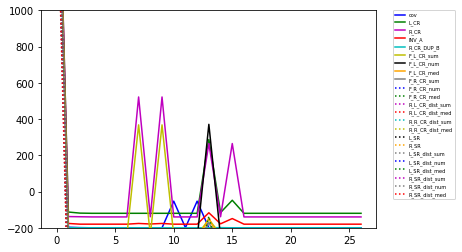

NanoSV: 1 DeepSV: 1 id: 275


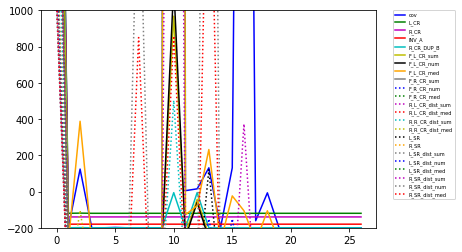

NanoSV: 1 DeepSV: 1 id: 280


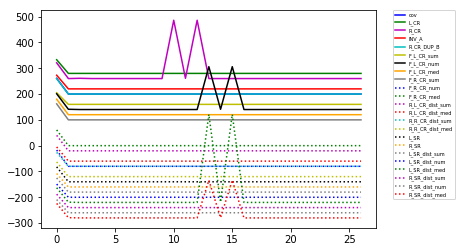

NanoSV: 1 DeepSV: 1 id: 285


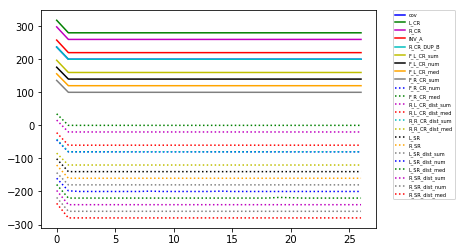

NanoSV: 1 DeepSV: 1 id: 290


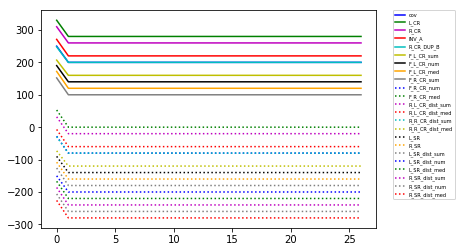

NanoSV: 1 DeepSV: 1 id: 295


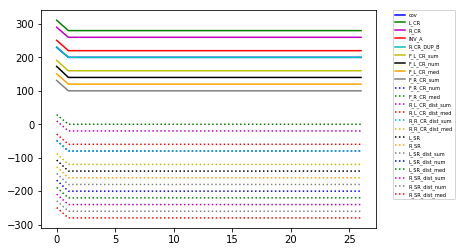

In [47]:
start_window = 0
print(n_windows)
#plot_channels(start_window, n_windows)

#print(Counter(y_train))

plot_channels(start_window, 300)

   
## Transposes every window in X, to comply to McFly format

In [14]:
def transposeDataset(X):
    image = []
    for i in range (0, len(X-1)):
        tr = X[i].transpose()
        image.append(tr)
    return np.array(image)

In [15]:
image1 = transposeDataset(X_train)
image2 = transposeDataset(X_val)
image3 = transposeDataset(X_test)
X_train = image1
X_val = image2
X_test = image3

n_channels = len(X_train[0][0])
print(len(X_test[0][0]))

27


## Prepare the labels in McFly format

In [16]:
classlabels = list(set(y_train))
mapclasses = {classlabels[i] : i for i in range(len(classlabels))}
print(mapclasses)

y_train = np.array([mapclasses[c] for c in y_train], dtype='int')
y_val = np.array([mapclasses[c] for c in y_val], dtype='int')
y_test = np.array([mapclasses[c] for c in y_test], dtype='int')

y_train_binary = to_categorical(y_train)
y_val_binary = to_categorical(y_val)
y_test_binary = to_categorical(y_test)

{'noSV': 0, 'DEL': 1}


In [17]:
y_test_binary

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

## Generate neural networks architectures

In [18]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Convolution1D, Flatten, MaxPooling1D
from keras.optimizers import Adam
import sys
import os
import numpy as np
sys.path.insert(0, os.path.abspath('..'))
from mcfly import modelgen, find_architecture

In [19]:
#From https://stackoverflow.com/questions/43076609/how-to-calculate-precision-and-recall-in-keras
import tensorflow as tf

def as_keras_metric(method):
    import functools
    from keras import backend as K
    import tensorflow as tf
    @functools.wraps(method)
    def wrapper(self, args, **kwargs):
        """ Wrapper for turning tensorflow metrics into keras metrics """
        value, update_op = method(self, args, **kwargs)
        K.get_session().run(tf.local_variables_initializer())
        with tf.control_dependencies([update_op]):
            value = tf.identity(value)
        return value
    return wrapper

#precision = as_keras_metric(tf.metrics.precision)
#recall = as_keras_metric(tf.metrics.recall)

In [20]:
from keras import backend as K

def check_units(y_true, y_pred):
    if y_pred.shape[1] != 1:
        y_pred = y_pred[:,1:2]
        y_true = y_true[:,1:2]
    return y_true, y_pred

def precision(y_true, y_pred):
    y_true, y_pred = check_units(y_true, y_pred)
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def recall(y_true, y_pred):
    y_true, y_pred = check_units(y_true, y_pred)
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    y_true, y_pred = check_units(y_true, y_pred)
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [21]:
np.random.seed = 321
num_classes = y_train_binary.shape[1]

In [22]:
%%time

models = modelgen.generate_models(X_train.shape,
                                  num_classes,
                                  number_of_models = 1,
                                  model_type = 'CNN',
                                  cnn_min_layers=1,
                                  cnn_max_layers=1,
                                  cnn_min_fc_nodes=4, 
                                  cnn_max_fc_nodes=6,
                                  low_lr=4, high_lr=4,
                                  metrics=['accuracy', precision, recall])

# models = modelgen.generate_models(X_train.shape,
#                                   num_classes,
#                                   number_of_models = 1,
#                                   model_type = 'DeepConvLSTM',
#                                   cnn_min_layers=1,
#                                   cnn_max_layers=1,
#                                   cnn_min_fc_nodes=4, 
#                                   cnn_max_fc_nodes=6,
#                                   low_lr=4, high_lr=4)

CPU times: user 348 ms, sys: 16.5 ms, total: 365 ms
Wall time: 363 ms


In [23]:
%%time
for model, params, model_types in models:
    print(params)
    model.summary()

{'learning_rate': 0.0001, 'regularization_rate': 0.0015128974666555643, 'filters': array([11]), 'fc_hidden_nodes': 6}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1 (Batch (None, 200, 27)           108       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 200, 11)           902       
_________________________________________________________________
batch_normalization_2 (Batch (None, 200, 11)           44        
_________________________________________________________________
activation_1 (Activation)    (None, 200, 11)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2200)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 13206     
________________________

## Train the networks

In [24]:
train_set_size = X_train.shape[0]
train_set_size

2594

In [25]:
# Define directory where the results, e.g. json file, will be stored
resultpath = os.path.join(datapath, '../data/models_PrecRec_test')
if not os.path.exists(resultpath):
        os.makedirs(resultpath)

In [26]:
#Inspecting code
import inspect
lines = inspect.getsource(find_architecture.train_models_on_samples)
#print(lines)

In [27]:
lines = inspect.getsource(modelgen.generate_models)
#print(lines)

In [28]:
lines = inspect.getsource(tf.metrics.precision)
print(lines)

@tf_export('metrics.precision')
def precision(labels,
              predictions,
              weights=None,
              metrics_collections=None,
              updates_collections=None,
              name=None):
  """Computes the precision of the predictions with respect to the labels.

  The `precision` function creates two local variables,
  `true_positives` and `false_positives`, that are used to compute the
  precision. This value is ultimately returned as `precision`, an idempotent
  operation that simply divides `true_positives` by the sum of `true_positives`
  and `false_positives`.

  For estimation of the metric over a stream of data, the function creates an
  `update_op` operation that updates these variables and returns the
  `precision`. `update_op` weights each prediction by the corresponding value in
  `weights`.

  If `weights` is `None`, weights default to 1. Use weights of 0 to mask values.

  Args:
    labels: The ground truth values, a `Tensor` whose dimensions mu

In [29]:
import mcfly
print(mcfly.__version__)

1.0.1


In [30]:
%%time
outputfile = os.path.join(resultpath, 'modelcomparison.json')
histories, val_accuracies, val_losses = find_architecture.train_models_on_samples(X_train, y_train_binary,
                                                                                  X_val, y_val_binary,
                                                                                  models,nr_epochs=1, 
                                                                                  subset_size=train_set_size,
                                                                                  verbose=True,
                                                                                  outputfile=outputfile,
                                                                                  metric='accuracy')
print('Details of the training process were stored in ',outputfile)

Training model 0 CNN
Train on 2594 samples, validate on 864 samples
Epoch 1/1
2594/2594 [==============================] - 5s 2ms/step - loss: 0.5725 - acc: 0.7348 - precision: 0.8245 - recall: 0.6113 - val_loss: 0.5495 - val_acc: 0.8449 - val_precision: 0.5139 - val_recall: 0.3715
Details of the training process were stored in  /hpc/cog_bioinf/ridder/users/lsantuari/Processed/Test/010818/TestData_010818/NA12878/ChannelData/../data/models_PrecRec_test/modelcomparison.json
CPU times: user 5.39 s, sys: 1.86 s, total: 7.25 s
Wall time: 5.74 s


## Plot training process

Currently run with a very low number of epochs

In [31]:
#%%time
#for i in range(len(models)):
#    name = str(models[i][1])
#    find_architecture.plotTrainingProcess(histories[i], name)



In [31]:
#%%time
import pandas as pd
results = pd.DataFrame({'model':[str(params) for model, params, model_types in models],
                       'train_acc': [history.history['acc'][-1] for history in histories],
                       'train_precision': [history.history['precision'][-1] for history in histories],
                       'train_recall': [history.history['recall'][-1] for history in histories],
                       'train_loss': [history.history['loss'][-1] for history in histories],
                       'val_acc': [history.history['val_acc'][-1] for history in histories],
                       'val_precision': [history.history['val_precision'][-1] for history in histories],
                       'val_recall': [history.history['val_recall'][-1] for history in histories],
                       'val_loss': [history.history['val_loss'][-1] for history in histories]
                       })
results

,model,train_acc,train_precision,train_recall,train_loss,val_acc,val_precision,val_recall,val_loss
0,"{'learning_rate': 0.0001, 'regularization_rate...",0.734773,0.824493,0.61135,0.572492,0.844907,0.513889,0.371528,0.549462


## Take the best current model 

In [31]:
best_model_index = np.argmax(val_accuracies)

In [32]:
best_model, best_params, best_model_types = models[best_model_index]
print(best_model_index, best_model_types, best_params)

0 CNN {'learning_rate': 0.0001, 'regularization_rate': 0.019538808070882135, 'filters': array([40]), 'fc_hidden_nodes': 5}


## Save the best current model

In [33]:
from keras.models import load_model

model_path = os.path.join(resultpath, sample_name+'_best_model')
print(model_path)

/hpc/cog_bioinf/ridder/users/lsantuari/Processed/Test/010818/TestData_010818/NA12878/ChannelData/../data/models_PrecRec_test/NA12878_best_model


In [34]:
best_model.save(model_path)

## Reload the best current model

In [35]:
#Using custom objects for loading precision and recall functions
model_reloaded = load_model(model_path, custom_objects={'precision': precision, 'recall':recall})

## Test best current model on testset

### Overall accuracy on the test set:

In [36]:
score_test = model_reloaded.evaluate(X_test, y_test_binary, verbose=True)
print('Test loss and accuracy of best model: ' + str(score_test))

866/866 [==============================] - 0s 305us/step
Test loss and accuracy of best model: [1.3854129350212925, 0.7055427251732102, 0.5045301115815689, 0.5034642032332564]


### Re-check the train and validation scores: 

In [37]:
best_model.get_config()[0]

{'class_name': 'BatchNormalization',
 'config': {'name': 'batch_normalization_1',
  'trainable': True,
  'batch_input_shape': (None, 200, 27),
  'dtype': 'float32',
  'axis': -1,
  'momentum': 0.99,
  'epsilon': 0.001,
  'center': True,
  'scale': True,
  'beta_initializer': {'class_name': 'Zeros', 'config': {}},
  'gamma_initializer': {'class_name': 'Ones', 'config': {}},
  'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}},
  'moving_variance_initializer': {'class_name': 'Ones', 'config': {}},
  'beta_regularizer': None,
  'gamma_regularizer': None,
  'beta_constraint': None,
  'gamma_constraint': None}}

In [38]:
score_train = model_reloaded.evaluate(X_train, y_train_binary, verbose=False)
print('Train Score of best model: ' + str(score_train))

Train Score of best model: [1.319602221273512, 0.7023901310717039, 0.5013415572637765, 0.49734681849306883]


In [39]:
score_val = model_reloaded.evaluate(X_val, y_val_binary, verbose=False)
print('Val Score of best model: ' + str(score_val))

Val Score of best model: [1.3502595954471164, 0.7094907407407407, 0.5042735051225733, 0.5150462962962963]


In [40]:
## Inspect model predictions on validation data
datasize = X_val.shape[0]
probs = model.predict_proba(X_val[:datasize,:,:],batch_size=1)

In [41]:
#columns are predicted, rows are truth
predicted = probs.argmax(axis=1)
#print(predicted)
y_index = y_val_binary.argmax(axis=1)
#print(y_index)
confusion_matrix = pd.crosstab(pd.Series(y_index), pd.Series(predicted))
confusion_matrix.index = [classlabels[i] for i in confusion_matrix.index]
confusion_matrix.columns = [classlabels[i] for i in confusion_matrix.columns]
confusion_matrix.reindex(columns=[l for l in classlabels], fill_value=0)
confusion_matrix

,DEL,noSV
DEL,184,248
noSV,3,429


In [10]:
# Run only if data and labels are loaded using the loader above
data_real = data
del data
labels_real= labels
del labels

In [24]:
# Load data and labels
#sample_name = 'PATIENT2'
#date = '010818'

#datapath_real ='/hpc/cog_bioinf/ridder/users/lsantuari/Processed/Test/'+date+'/TestData_'+date+'/'+sample_name+'/ChannelData/'

In [49]:
%%time
#Loading Patient data

# Load data and labels
sample_name = 'PATIENT1'
date = '010818'

datapath_real ='/hpc/cog_bioinf/ridder/users/lsantuari/Processed/Test/'+date+'/TestData_'+date+'/'+sample_name+'/ChannelData/'

use_gz = True

if use_gz:
    
    data_output_file = datapath_real + '../X.npy.gz'
    with gzip.GzipFile(data_output_file, "rb") as f:
        data_real = np.load(f)
    f.close()

    label_output_file = datapath_real + '../y.npy.gz'
    with gzip.GzipFile(label_output_file, "rb") as f:
        labels_real = np.load(f)
    f.close()

else:
        
    data_output_file_npy = datapath_real + '../X.npy'
    data_real = np.load(data_output_file_npy)

    label_output_file_npy = datapath_real + '../y.npy'
    labels_real = np.load(label_output_file_npy)

CPU times: user 2min 15s, sys: 15 s, total: 2min 31s
Wall time: 2min 30s


In [50]:
print(data_real.shape)
print(len(labels_real))

(1078694, 27, 200)
1078694


In [51]:
#Remove UK labels?
keep = np.where(labels_real!='UK')

data_real = data_real[keep]
labels_real = labels_real[keep]

In [52]:
#Relabel deletions
del_idx = np.where(np.logical_or(np.array(labels_real)=='DEL_start',np.array(labels_real)=='DEL_end'))
print(del_idx)
print(len(del_idx))
print(len(labels_real))
labels_real[del_idx] = 'DEL'

(array([    968,     969,    4568, ..., 1077139, 1077140, 1077201]),)
1
1077421


In [53]:
%%time

# Label unknown-UK as noSV?
#labels_real[np.where(labels_real=='UK')] = 'noSV'

#transpose X for McFly
X_test_real = transposeDataset(data_real)
y_test_real = labels_real

classlabels = list(set(y_test_real))
mapclasses = {classlabels[i] : i for i in range(len(classlabels))}
print(mapclasses)

y_test_real = np.array([mapclasses[c] for c in y_test_real], dtype='int')
y_test_real_binary = to_categorical(y_test_real)

{'DEL': 0, 'noSV': 1}
CPU times: user 26.2 s, sys: 46.7 s, total: 1min 12s
Wall time: 1min 9s


In [54]:
score_test = model_reloaded.evaluate(X_test_real, y_test_real_binary, verbose=True)
print('Test loss and accuracy of best model: ' + str(score_test))

1077421/1077421 [==============================] - 129s 119us/step
Test loss and accuracy of best model: [1.0548194549496985, 0.9853845432752092, 0.9974329969577614, 0.9878486396583894]


In [55]:
%%time
## Inspect model predictions on test data
datasize = X_test_real.shape[0]
probs = model_reloaded.predict_proba(X_test_real, batch_size=1000, verbose=True)

1077421/1077421 [==============================] - 36s 33us/step
CPU times: user 34 s, sys: 2.94 s, total: 37 s
Wall time: 35.6 s


In [56]:
np.save(file=datapath_real + '../probs_nanosv_manta.npy', arr=probs)

In [57]:
import pandas as pd

#columns are predicted, rows are truth
predicted = probs.argmax(axis=1)
#print(predicted)
y_index = y_test_real_binary.argmax(axis=1)
#print(y_index)
confusion_matrix = pd.crosstab(pd.Series(y_index), pd.Series(predicted))
confusion_matrix.index = [classlabels[i] for i in confusion_matrix.index]
confusion_matrix.columns = [classlabels[i] for i in confusion_matrix.columns]
confusion_matrix.reindex(columns=[l for l in classlabels], fill_value=0)
confusion_matrix

,DEL,noSV
DEL,963,2672
noSV,13075,1060711


In [65]:
print(classlabels)

['DEL', 'noSV']


In [70]:
y_true = [classlabels[i] for i in y_index]
y_pred = [classlabels[i] for i in predicted]

#print(np.where(np.all(y_true=='noSV' and y_pred=='DEL')))

noSV_DEL = [i-1 for i, value in enumerate(zip(y_true, y_pred)) if value[0]=='noSV' and value[1]=='DEL']
DEL_noSV = [i-1 for i, value in enumerate(zip(y_true, y_pred)) if value[0]=='DEL' and value[1]=='noSV']

print(len(noSV_DEL))
print(len(DEL_noSV))

13075
2672
